In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-signs-dataset-in-yolo-format/yolov3_ts_train.cfg
/kaggle/input/traffic-signs-dataset-in-yolo-format/getting-full-path.py
/kaggle/input/traffic-signs-dataset-in-yolo-format/test.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts_data.data
/kaggle/input/traffic-signs-dataset-in-yolo-format/train.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/traffic-sign-to-test.mp4
/kaggle/input/traffic-signs-dataset-in-yolo-format/classes.names
/kaggle/input/traffic-signs-dataset-in-yolo-format/yolov3_ts_test.cfg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00266.jpg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00286.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00080.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00440.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00822.jpg
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00733.txt
/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts/00

In [2]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [3]:
# to remove a directory
try:
    shutil.rmtree("/kaggle/working/dataset")
    shutil.rmtree("/kaggle/working/yolov5")
except:
    pass

In [4]:
!dir

__notebook_source__.ipynb


In [5]:
# cloning the yolo repo
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15008, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15008 (delta 2), reused 2 (delta 0), pack-reused 15002
Receiving objects: 100% (15008/15008), 14.09 MiB | 24.08 MiB/s, done.
Resolving deltas: 100% (10293/10293), done.


In [6]:
%cd yolov5/

/kaggle/working/yolov5


In [7]:
!dir

CITATION.cff	 README.zh-CN.md  detect.py   requirements.txt	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   segment		utils
LICENSE		 classify	  hubconf.py  setup.cfg		val.py
README.md	 data		  models      train.py


In [8]:
!pip install -r requirements.txt

In [9]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/kaggle/working/dataset/images/train"
val_path = "/kaggle/working/dataset/images/val"

# images are initially stored here in kaggle
crs_path = "/kaggle/input/traffic-signs-dataset-in-yolo-format/ts/ts"

# deciding the ration in which the dataset needs to be divided
train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname, dirs, files) in os.walk(crs_path):
    for filename in files:
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs) * train_ratio)
count_for_val = int(len(imgs) * val_ratio)
print("Training images are : ",count_for_train)
print("Validation images are : ",count_for_val)

Training images are :  592
Validation images are :  148


In [10]:
# creation of directories in kaggle/working path
train_image_path = "/kaggle/working/dataset/images/train"
train_label_path = "/kaggle/working/dataset/labels/train"
val_image_path = "/kaggle/working/dataset/images/val"
val_label_path = "/kaggle/working/dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

In [11]:
# For training images
# Copying the images from input directory to working directory -> kaggle/working/dataset/images/train
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

In [12]:
# For test images
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

In [13]:
!pip install googledrivedownloader

In [14]:
# Downloading dataset.yaml file from google drive
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1K8s8bCmODU8nDhSTtWy2F-RbvmQ-8yha',
                                    dest_path='/kaggle/working/dataset/dataset.yaml')

In [22]:
# cache is used for faster processing
# workers are number of cpu cores to be used in training
# wandb is for data visualization
!wandb disabled
!python train.py --img 415 --batch 16 --data /kaggle/working/dataset/dataset.yaml --weights yolov5s.pt --cache --workers 2

W&B disabled.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_ga

In [16]:
os.listdir("/kaggle/working/dataset/images/val")

['00084.jpg',
 '00884.jpg',
 '00154.jpg',
 '00363.jpg',
 '00250.jpg',
 '00649.jpg',
 '00156.jpg',
 '00115.jpg',
 '00274.jpg',
 '00270.jpg',
 '00212.jpg',
 '00140.jpg',
 '00002.jpg',
 '00024.jpg',
 '00518.jpg',
 '00751.jpg',
 '00455.jpg',
 '00512.jpg',
 '00128.jpg',
 '00309.jpg',
 '00069.jpg',
 '00822.jpg',
 '00175.jpg',
 '00313.jpg',
 '00109.jpg',
 '00379.jpg',
 '00111.jpg',
 '00272.jpg',
 '00470.jpg',
 '00879.jpg',
 '00061.jpg',
 '00410.jpg',
 '00064.jpg',
 '00436.jpg',
 '00076.jpg',
 '00420.jpg',
 '00521.jpg',
 '00531.jpg',
 '00671.jpg',
 '00138.jpg',
 '00257.jpg',
 '00771.jpg',
 '00019.jpg',
 '00744.jpg',
 '00281.jpg',
 '00477.jpg',
 '00085.jpg',
 '00122.jpg',
 '00099.jpg',
 '00283.jpg',
 '00435.jpg',
 '00736.jpg',
 '00785.jpg',
 '00663.jpg',
 '00157.jpg',
 '00129.jpg',
 '00486.jpg',
 '00554.jpg',
 '00432.jpg',
 '00624.jpg',
 '00474.jpg',
 '00136.jpg',
 '00075.jpg',
 '00741.jpg',
 '00467.jpg',
 '00220.jpg',
 '00653.jpg',
 '00722.jpg',
 '00167.jpg',
 '00828.jpg',
 '00853.jpg',
 '0085

In [32]:
# runs folder is created after the training where the updated weights are save
!python detect.py --source /kaggle/working/dataset/images/val/00884.jpg --weights runs/train/exp2/weights/best.pt --data /kaggle/working/dataset/dataset.yaml

detect: weights=['runs/train/exp2/weights/best.pt'], source=/kaggle/working/dataset/images/val/00884.jpg, data=/kaggle/working/dataset/dataset.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/dataset/images/val/00884.jpg: 384x640 2 prohibitorys, 9.0ms
Speed: 0.4ms pre-process, 9.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


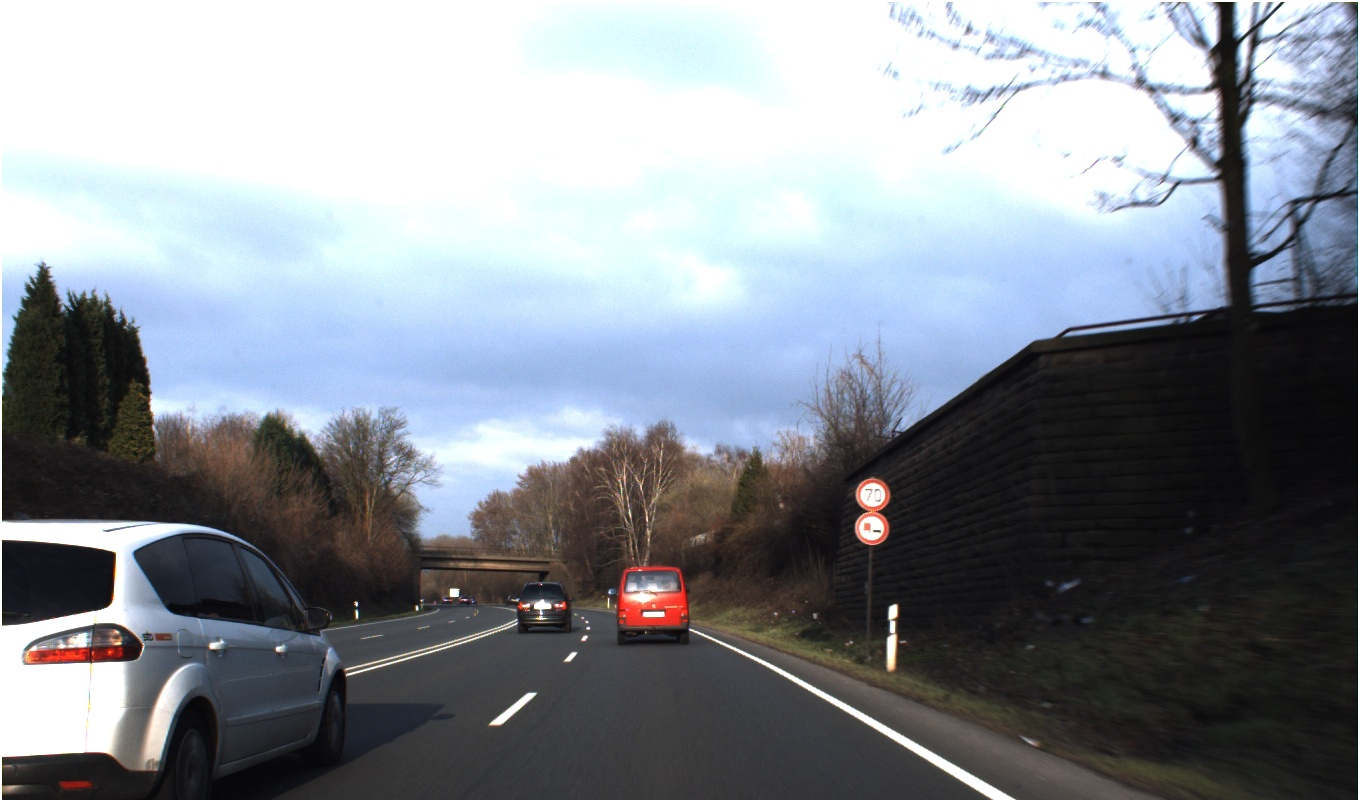

In [33]:
Image(filename='/kaggle/working/dataset/images/val/00884.jpg', width=416)

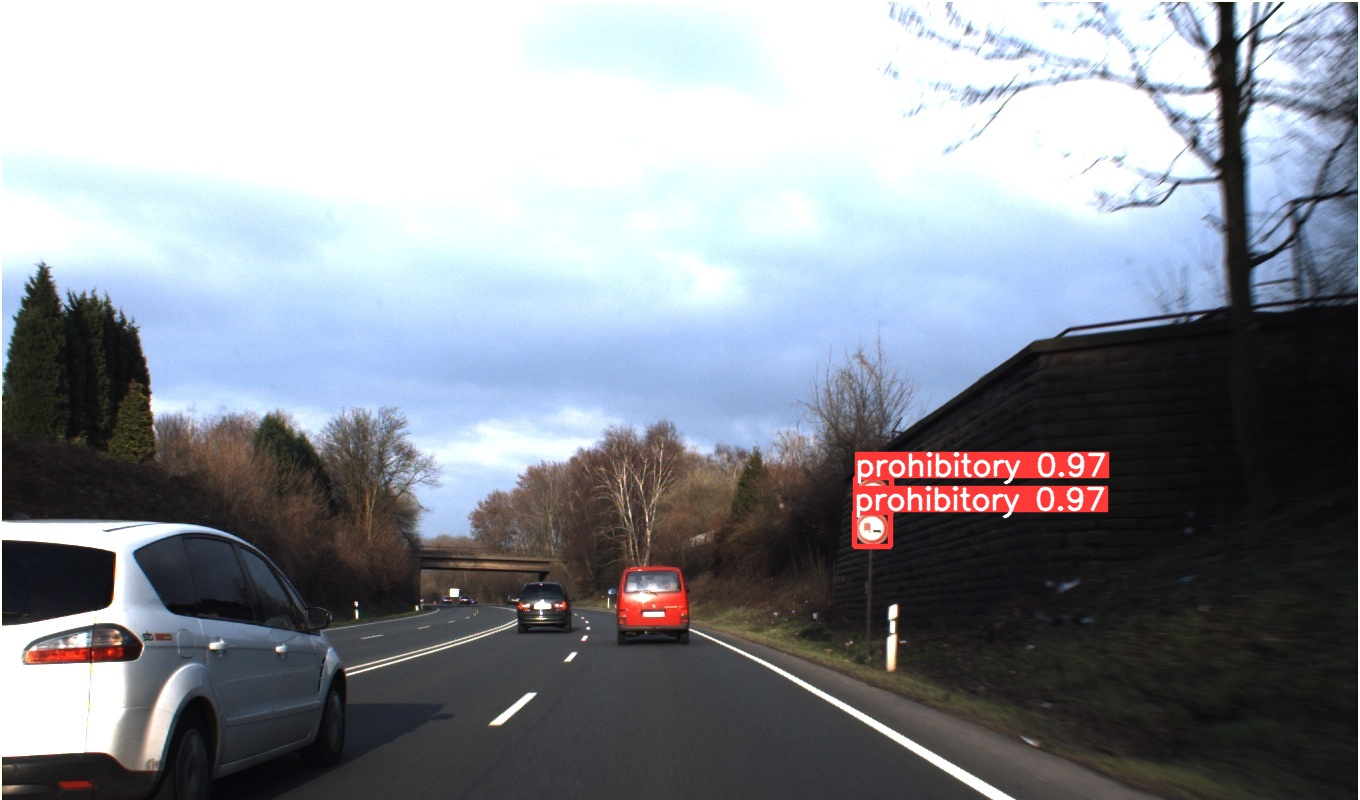

In [34]:
Image(filename='./runs/detect/exp6/00884.jpg', width=416)

In [35]:
def add_brightness(image):    
    image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
    ## Conversion to HLS    
    image_HLS = np.array(image_HLS, dtype = np.float64)     
    random_brightness_coefficient = np.random.uniform()+0.5 
    ## generates value between 0.5 and 1.5    
    image_HLS[:,:,1] = image_HLS[:,:,1]*random_brightness_coefficient 
    ## scale pixel values up or down for channel 1(Lightness)    
    image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 
    ##Sets all values above 255 to 255    
    image_HLS = np.array(image_HLS, dtype = np.uint8)    
    image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
    ## Conversion to RGB    
    return image_RGB

In [38]:
src = cv2.imread('/kaggle/working/dataset/images/val/00884.jpg')

In [58]:
sunny_image = add_brightness(src)
data = im.fromarray(sunny_image)

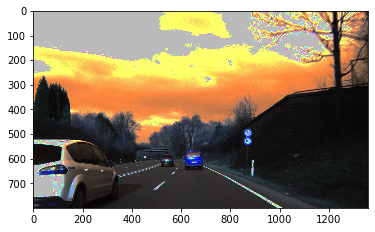

In [59]:
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [61]:
test_images_path = "/kaggle/working/dataset/test_images"

if not os.path.isdir(test_images_path):
    os.makedirs(test_images_path)

In [62]:
data.save('/kaggle/working/dataset/test_images/sunny_pic.jpg')

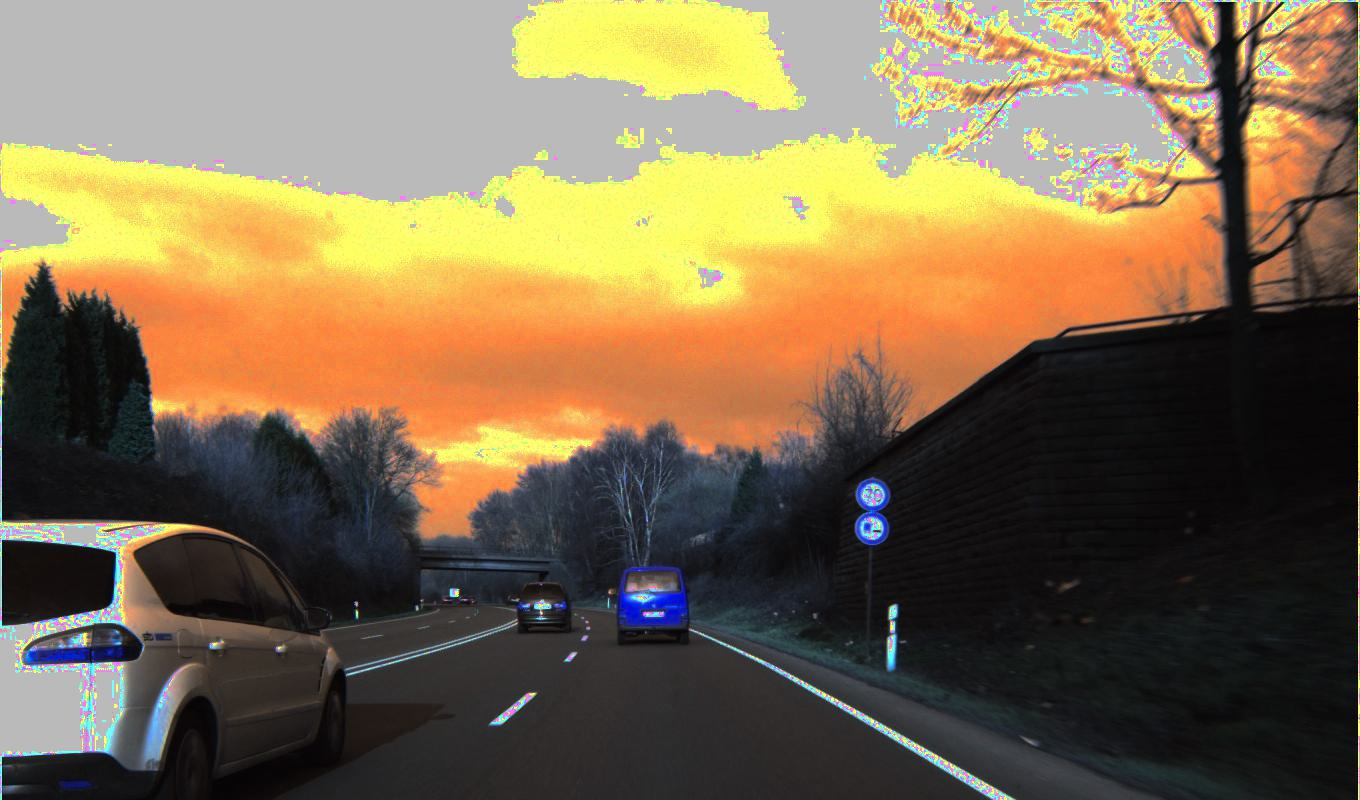

In [63]:
Image(filename='/kaggle/working/dataset/test_images/sunny_pic.jpg', width=416)

In [66]:
!python detect.py --source /kaggle/working/dataset/test_images/sunny_pic.jpg --weights runs/train/exp2/weights/best.pt --data /kaggle/working/dataset/dataset.yaml

detect: weights=['runs/train/exp2/weights/best.pt'], source=/kaggle/working/dataset/test_images/sunny_pic.jpg, data=/kaggle/working/dataset/dataset.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/dataset/test_images/sunny_pic.jpg: 384x640 2 mandatorys, 8.9ms
Speed: 0.4ms pre-process, 8.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp9


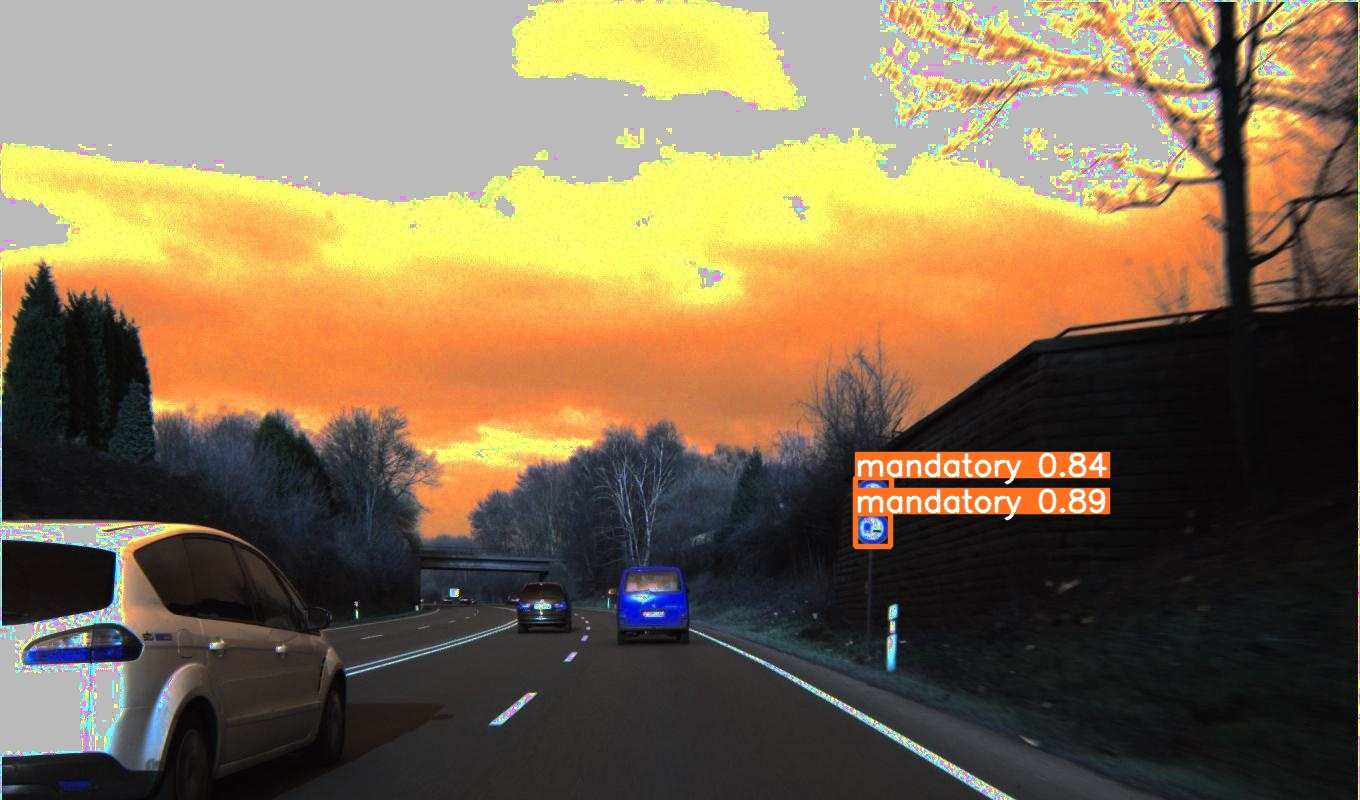

In [67]:
Image(filename='./runs/detect/exp9/sunny_pic.jpg', width=416)

In [68]:
def add_snow(image):    
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
        ## Conversion to HLS    
        image_HLS = np.array(image_HLS, dtype = np.float64)     
        brightness_coefficient = 2.5     
        snow_point=100 ## increase this for more snow    
        image_HLS[:,:,1][image_HLS[:,:,1]<snow_point] = image_HLS[:,:,1][image_HLS[:,:,1]<snow_point]*brightness_coefficient 
        ## scale pixel values up for channel 1(Lightness)    
        image_HLS[:,:,1][image_HLS[:,:,1]>255]  = 255 
        ##Sets all values above 255 to 255    
        image_HLS = np.array(image_HLS, dtype = np.uint8)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
        ## Conversion to RGB    
        return image_RGB

In [69]:
src2 = cv2.imread('/kaggle/working/dataset/images/val/00884.jpg')

In [71]:
snowy_image = add_snow(src2)
data2 = im.fromarray(snowy_image)

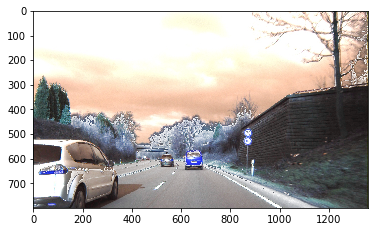

In [72]:
plt.imshow(data2, interpolation='nearest')
plt.show()

In [73]:
data2.save('/kaggle/working/dataset/test_images/snowy_image.jpg')

In [74]:
!python detect.py --source /kaggle/working/dataset/test_images/snowy_image.jpg --weights runs/train/exp2/weights/best.pt --data /kaggle/working/dataset/dataset.yaml

detect: weights=['runs/train/exp2/weights/best.pt'], source=/kaggle/working/dataset/test_images/snowy_image.jpg, data=/kaggle/working/dataset/dataset.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/dataset/test_images/snowy_image.jpg: 384x640 1 mandatory, 1 other, 11.0ms
Speed: 0.5ms pre-process, 11.0ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10


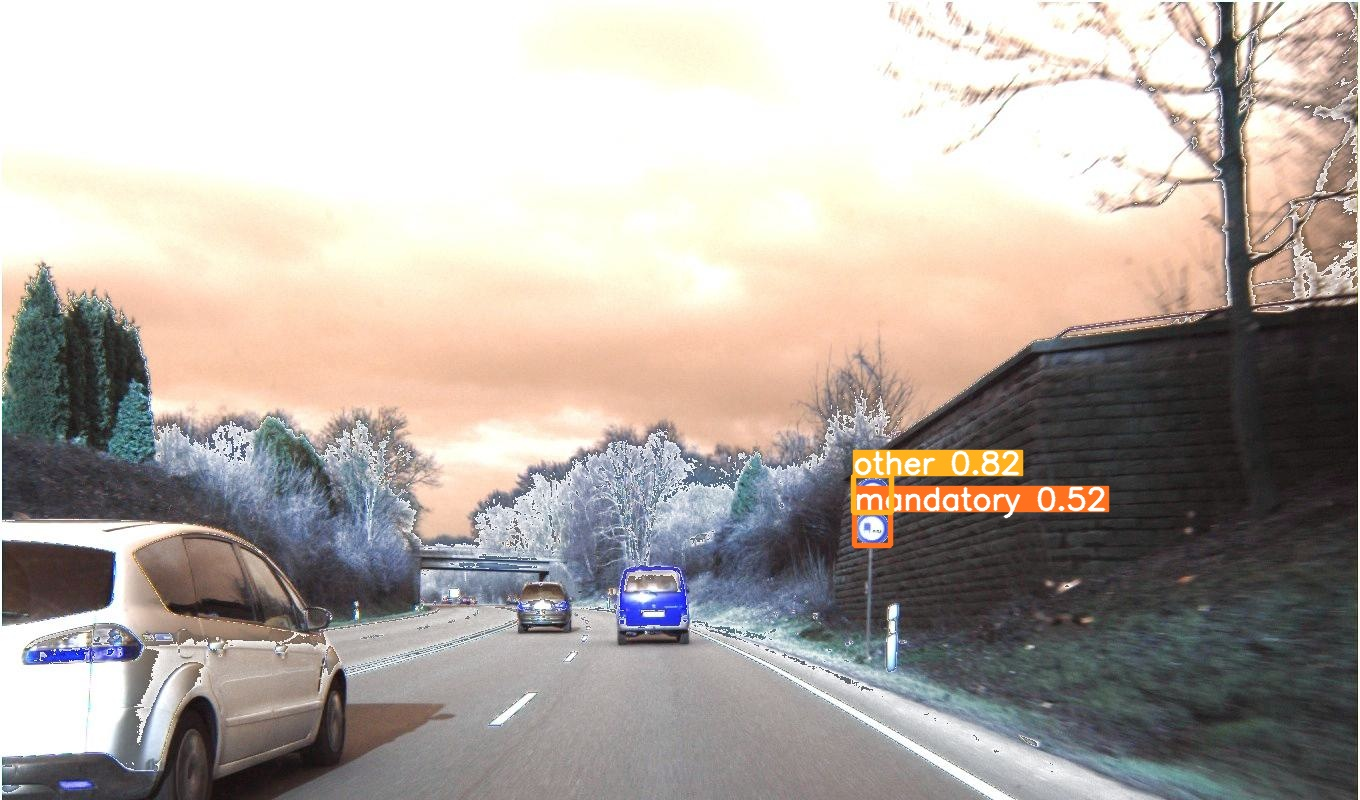

In [75]:
Image(filename='./runs/detect/exp10/snowy_image.jpg', width=416)

In [83]:
def generate_random_lines(imshape,slant,drop_length):    
    drops=[]    
    for i in range(1500): 
    ## If You want heavy rain, try increasing this    
        if slant<0:
            x= np.random.randint(slant,imshape[1])        
        else:            
            x= np.random.randint(0,imshape[1]-slant)        
        y= np.random.randint(0,imshape[0]-drop_length)        
        drops.append((x,y))   
    return drops            
    
def add_rain(image):        
    imshape = image.shape    
    slant_extreme=10    
    slant= np.random.randint(-slant_extreme,slant_extreme)     
    drop_length=20    
    drop_width=2    
    drop_color=(200,200,200)
    ## a shade of gray    
    rain_drops= generate_random_lines(imshape,slant,drop_length)        
    for rain_drop in rain_drops:        
        cv2.line(image,(rain_drop[0],rain_drop[1]),(rain_drop[0]+slant,rain_drop[1]+drop_length),drop_color,drop_width)    
#         image= cv2.blur(image,(7,7)) 
        ## rainy view are blurry        
        brightness_coefficient = 0.7 
        ## rainy days are usually shady     
        image_HLS = cv2.cvtColor(image,cv2.COLOR_RGB2HLS) 
        ## Conversion to HLS    
        image_HLS[:,:,1] = image_HLS[:,:,1]*brightness_coefficient 
        ## scale pixel values down for channel 1(Lightness)    
        image_RGB = cv2.cvtColor(image_HLS,cv2.COLOR_HLS2RGB) 
        ## Conversion to RGB    
    return image_RGB

In [86]:
src3 = cv2.imread('/kaggle/working/dataset/images/val/00884.jpg')
rainy_image = add_rain(src3)
data3 = im.fromarray(rainy_image)

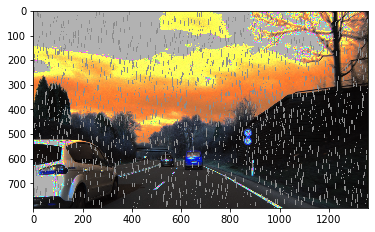

In [87]:
plt.imshow(data3, interpolation='nearest')
plt.show()

In [88]:
data3.save('/kaggle/working/dataset/test_images/rainy_image.jpg')

In [90]:
!python detect.py --source /kaggle/working/dataset/test_images/rainy_image.jpg --weights runs/train/exp2/weights/best.pt --data /kaggle/working/dataset/dataset.yaml

detect: weights=['runs/train/exp2/weights/best.pt'], source=/kaggle/working/dataset/test_images/rainy_image.jpg, data=/kaggle/working/dataset/dataset.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/dataset/test_images/rainy_image.jpg: 384x640 2 mandatorys, 9.1ms
Speed: 0.4ms pre-process, 9.1ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp12


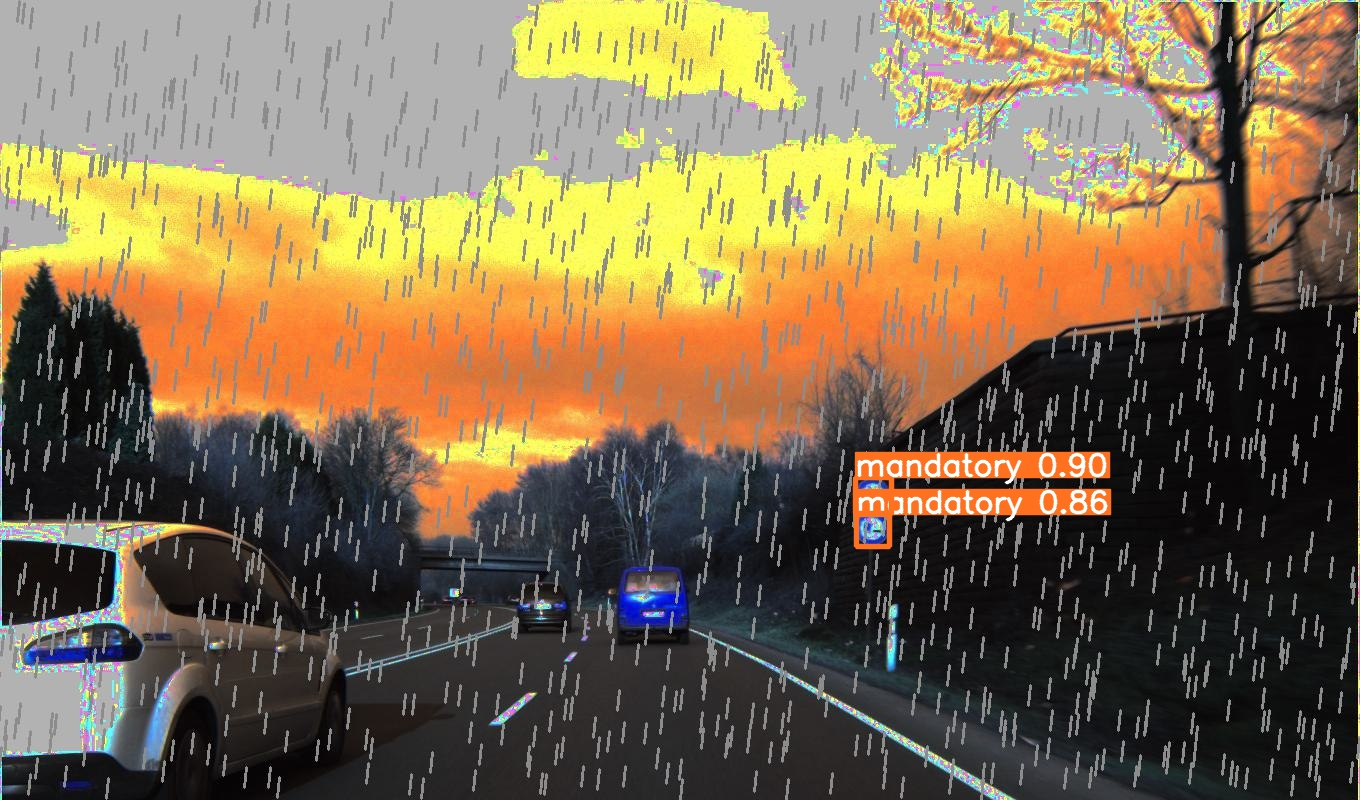

In [91]:
Image(filename='./runs/detect/exp12/rainy_image.jpg', width=416)

In [92]:
gdd.download_file_from_google_drive(file_id='1nrbbdB9xVxnvcVc2ZpJInhX-OoYZD5K8',
                                    dest_path='/kaggle/working/dataset/test_image/night_image.jpg')

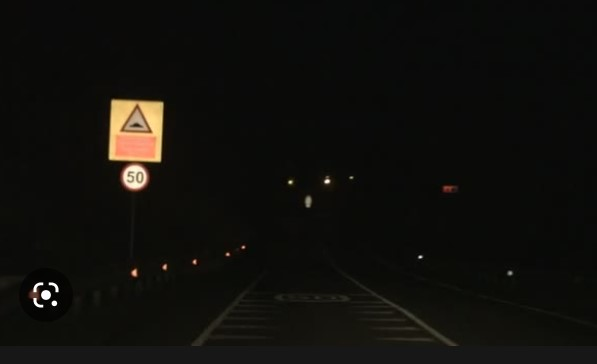

In [93]:
Image(filename='/kaggle/working/dataset/test_image/night_image.jpg', width=416)

In [95]:
!python detect.py --source /kaggle/working/dataset/test_image/night_image.jpg --weights runs/train/exp2/weights/best.pt --data /kaggle/working/dataset/dataset.yaml

detect: weights=['runs/train/exp2/weights/best.pt'], source=/kaggle/working/dataset/test_image/night_image.jpg, data=/kaggle/working/dataset/dataset.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/working/dataset/test_image/night_image.jpg: 416x640 2 prohibitorys, 1 danger, 9.4ms
Speed: 0.4ms pre-process, 9.4ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp14


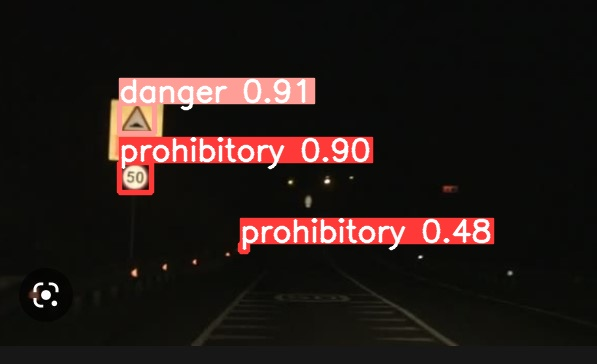

In [98]:
Image(filename='./runs/detect/exp14/night_image.jpg', width=416)